In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns
import joblib
import shap

C:\Users\dishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
traindf=pd.read_csv(r"C:\Users\dishi\OneDrive\Desktop\daiict\traindf.csv")
testdf=pd.read_csv(r"C:\Users\dishi\OneDrive\Desktop\daiict\testdf.csv")
valdf=pd.read_csv(r"C:\Users\dishi\OneDrive\Desktop\daiict\valdf.csv")

In [22]:
colstr = [col for col in traindf.columns if 'Top_Power_Spectrum' in col or "Top_Bispectrum" in col]
train=traindf.drop(columns=colstr)
train

,Filename,Zero_Crossing_Rate,RMS_Energy,Signal_Mean,Signal_Std,Amplitude_Envelope,Spectral_Centroid,Spectral_Bandwidth,Spectral_Rolloff,Skewness,...,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20,Label
0,file1000.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,0.096016,0.149658,0.000025,0.159216,0.105890,1078.168853,953.278973,2079.326923,0.996253,...,-4.823803,-3.223139,-6.300480,-13.254174,-6.715222,-4.396545,-11.634704,-7.913574,-11.300100,fake
1,file10000.mp3.wav_16k.wav_norm.wav_mono.wav_si...,0.104691,0.123297,0.000089,0.144829,0.084826,1198.213107,990.790008,2194.120763,1.224928,...,-7.891137,-5.863118,-0.050900,-14.596033,-3.276490,-0.365631,-17.977350,1.371533,-6.659691,fake
2,file10001.mp3.wav_16k.wav_norm.wav_mono.wav_si...,0.112712,0.279252,-0.000084,0.305563,0.232088,1668.084345,1293.491657,2468.229167,-0.272970,...,-12.991060,-9.796099,-7.958375,-11.063889,-6.213257,-9.251461,-10.343571,-6.216683,-11.790934,fake
3,file10002.mp3.wav_16k.wav_norm.wav_mono.wav_si...,0.208171,0.124278,0.023964,0.140662,0.083083,2303.951255,1667.619047,3940.577652,1.284183,...,11.072993,-19.181587,11.822822,-12.432229,5.657724,-7.355902,2.361627,-5.683044,6.448072,fake
4,file10004.mp3.wav_16k.wav_norm.wav_mono.wav_si...,0.117786,0.217380,0.000161,0.234099,0.165969,1625.201310,1493.868111,2898.941532,0.295258,...,1.808059,-11.609379,6.047245,-16.681952,2.493800,-18.725605,4.960940,-17.778484,1.680220,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53861,file9995.wav_16k.wav_norm.wav_mono.wav_silence...,0.234381,0.088500,0.000003,0.103696,0.061248,2534.916771,1629.019513,4205.462598,0.795311,...,-14.263483,-1.375326,-14.771313,-13.855188,-9.327065,-8.330450,-5.377988,-11.013118,-1.821347,real
53862,file9996.wav_16k.wav_norm.wav_mono.wav_silence...,0.044896,0.185252,0.000069,0.214637,0.137023,944.969092,1364.528539,1918.448465,-0.729333,...,1.170808,-7.035944,6.755926,-7.524114,3.354739,-1.801737,1.159530,-5.787135,-1.111397,real
53863,file9997.wav_16k.wav_norm.wav_mono.wav_silence...,0.127060,0.123234,-0.000003,0.135632,0.090702,1586.896947,1465.434354,2942.349138,0.374917,...,-0.501590,-10.381263,11.252217,-10.591700,0.338711,-11.559120,-0.514204,-13.183001,2.411661,real
53864,file9998.wav_16k.wav_norm.wav_mono.wav_silence...,0.149628,0.079510,0.000025,0.097007,0.055705,1840.075067,1557.200940,3317.057292,0.813483,...,-10.001678,-6.834194,-15.030824,-10.566125,-8.122252,-4.189777,-2.614009,-5.664138,-2.282396,real


In [23]:
colste = [col for col in testdf.columns if 'Top_Power_Spectrum' in col or "Top_Bispectrum" in col]
test=testdf.drop(columns=colste)

In [24]:
colsv = [col for col in valdf.columns if 'Top_Power_Spectrum' in col or "Top_Bispectrum" in col]
val=valdf.drop(columns=colsv)

In [7]:
train.describe()

,Zero_Crossing_Rate,RMS_Energy,Signal_Mean,Signal_Std,Amplitude_Envelope,Spectral_Centroid,Spectral_Bandwidth,Spectral_Rolloff,Skewness,Kurtosis,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20
count,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,...,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000,53866.000000
mean,0.139048,0.144530,0.002524,0.159233,0.105105,1717.395320,1468.232297,3115.433609,0.323164,5.426798,...,-10.346027,-3.132573,-6.856335,-1.380813,-9.940779,-2.413519,-7.169308,-3.304432,-7.773741,-2.305941
std,0.053838,0.051107,0.035325,0.046909,0.044688,463.979975,221.296827,744.859707,0.745862,32.838503,...,6.752245,7.884958,7.595999,9.038188,6.492102,6.220182,6.460585,6.323114,4.863876,5.119747
min,0.000000,0.016775,-0.999996,0.000010,0.012750,13.640520,82.530324,28.597384,-19.088139,-1.486212,...,-45.934395,-31.650621,-37.658306,-29.280418,-35.736893,-31.000233,-37.042423,-30.318943,-26.281399,-22.140343
25%,0.100043,0.108880,-0.000052,0.125233,0.075650,1376.339858,1356.233210,2602.338471,-0.258060,2.435787,...,-14.147814,-9.361624,-11.625096,-8.978165,-13.664973,-6.684727,-10.969662,-7.506819,-11.260491,-5.996233
50%,0.135011,0.139710,0.000012,0.154764,0.098899,1696.237509,1501.542068,3148.835106,0.399330,4.268847,...,-10.416024,-3.003409,-6.018056,-0.875790,-10.352050,-2.334287,-6.922891,-3.372858,-8.026079,-2.127186
75%,0.176316,0.174136,0.000103,0.188999,0.128069,2054.448496,1612.911136,3662.282958,0.796025,6.698541,...,-6.348116,2.497218,-1.290589,5.947661,-6.235305,1.821312,-2.640280,1.366008,-4.565372,1.286397
max,0.498434,0.997190,0.571295,0.485237,0.999996,4597.137233,2491.787983,6495.572917,9.284665,7307.477297,...,24.616722,32.085583,26.890350,25.308384,19.347992,20.305904,18.690294,16.593820,18.727540,20.309784


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53866 entries, 0 to 53865
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Filename            53866 non-null  object 
 1   Zero_Crossing_Rate  53866 non-null  float64
 2   RMS_Energy          53866 non-null  float64
 3   Signal_Mean         53866 non-null  float64
 4   Signal_Std          53866 non-null  float64
 5   Amplitude_Envelope  53866 non-null  float64
 6   Spectral_Centroid   53866 non-null  float64
 7   Spectral_Bandwidth  53866 non-null  float64
 8   Spectral_Rolloff    53866 non-null  float64
 9   Skewness            53866 non-null  float64
 10  Kurtosis            53866 non-null  float64
 11  MFCC_1              53866 non-null  float64
 12  MFCC_2              53866 non-null  float64
 13  MFCC_3              53866 non-null  float64
 14  MFCC_4              53866 non-null  float64
 15  MFCC_5              53866 non-null  float64
 16  MFCC

In [8]:
train.isnull().sum()

Filename              0
Zero_Crossing_Rate    0
RMS_Energy            0
Signal_Mean           0
Signal_Std            0
Amplitude_Envelope    0
Spectral_Centroid     0
Spectral_Bandwidth    0
Spectral_Rolloff      0
Skewness              0
Kurtosis              0
MFCC_1                0
MFCC_2                0
MFCC_3                0
MFCC_4                0
MFCC_5                0
MFCC_6                0
MFCC_7                0
MFCC_8                0
MFCC_9                0
MFCC_10               0
MFCC_11               0
MFCC_12               0
MFCC_13               0
MFCC_14               0
MFCC_15               0
MFCC_16               0
MFCC_17               0
MFCC_18               0
MFCC_19               0
MFCC_20               0
Label                 0
dtype: int64

In [9]:
count = train['Label'].value_counts()
count

Label
real    26939
fake    26927
Name: count, dtype: int64

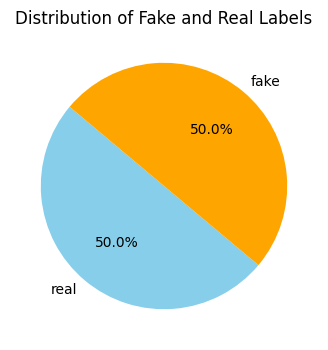

In [10]:
plt.figure(figsize=(4, 4))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribution of Fake and Real Labels')
plt.show()

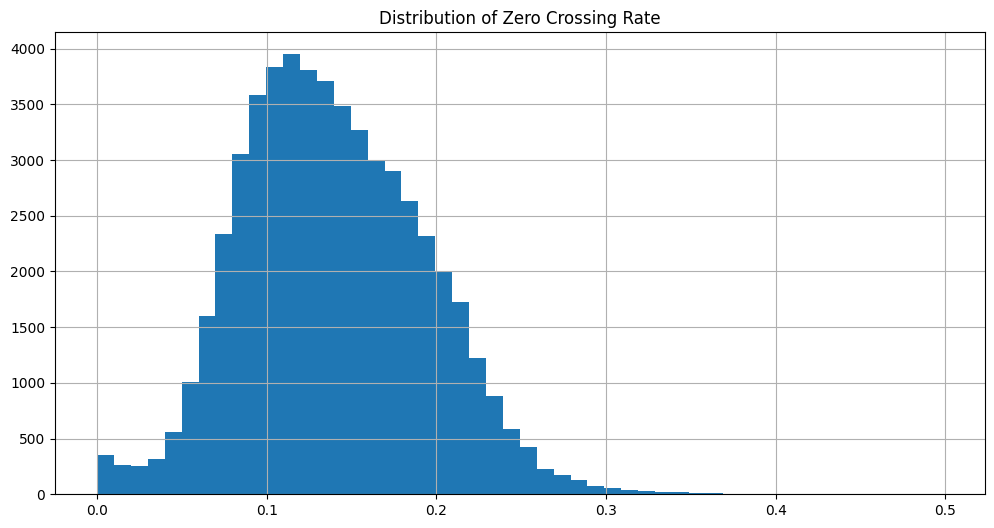

In [11]:
plt.figure(figsize=(12, 6))
train['Zero_Crossing_Rate'].hist(bins=50)
plt.title('Distribution of Zero Crossing Rate')
plt.show()

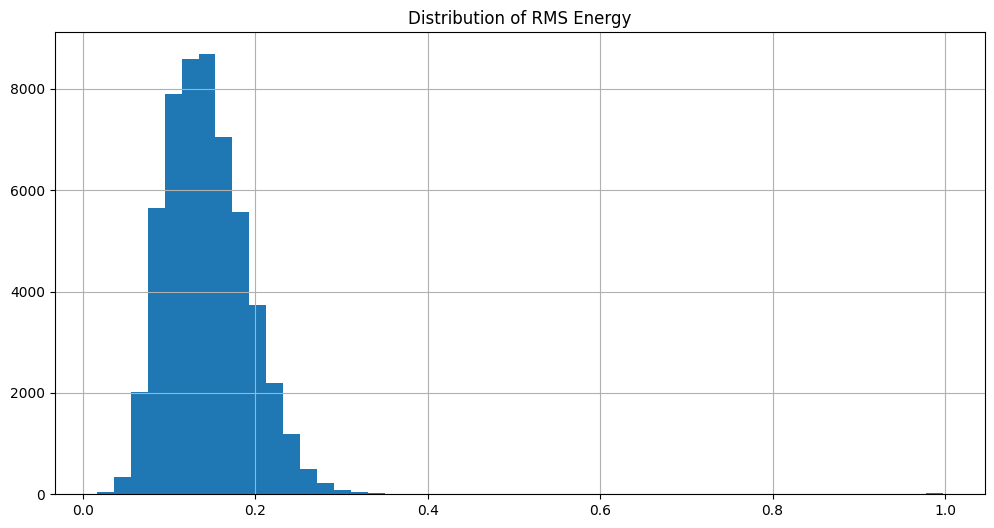

In [12]:
plt.figure(figsize=(12, 6))
train['RMS_Energy'].hist(bins=50)
plt.title('Distribution of RMS Energy')
plt.show()

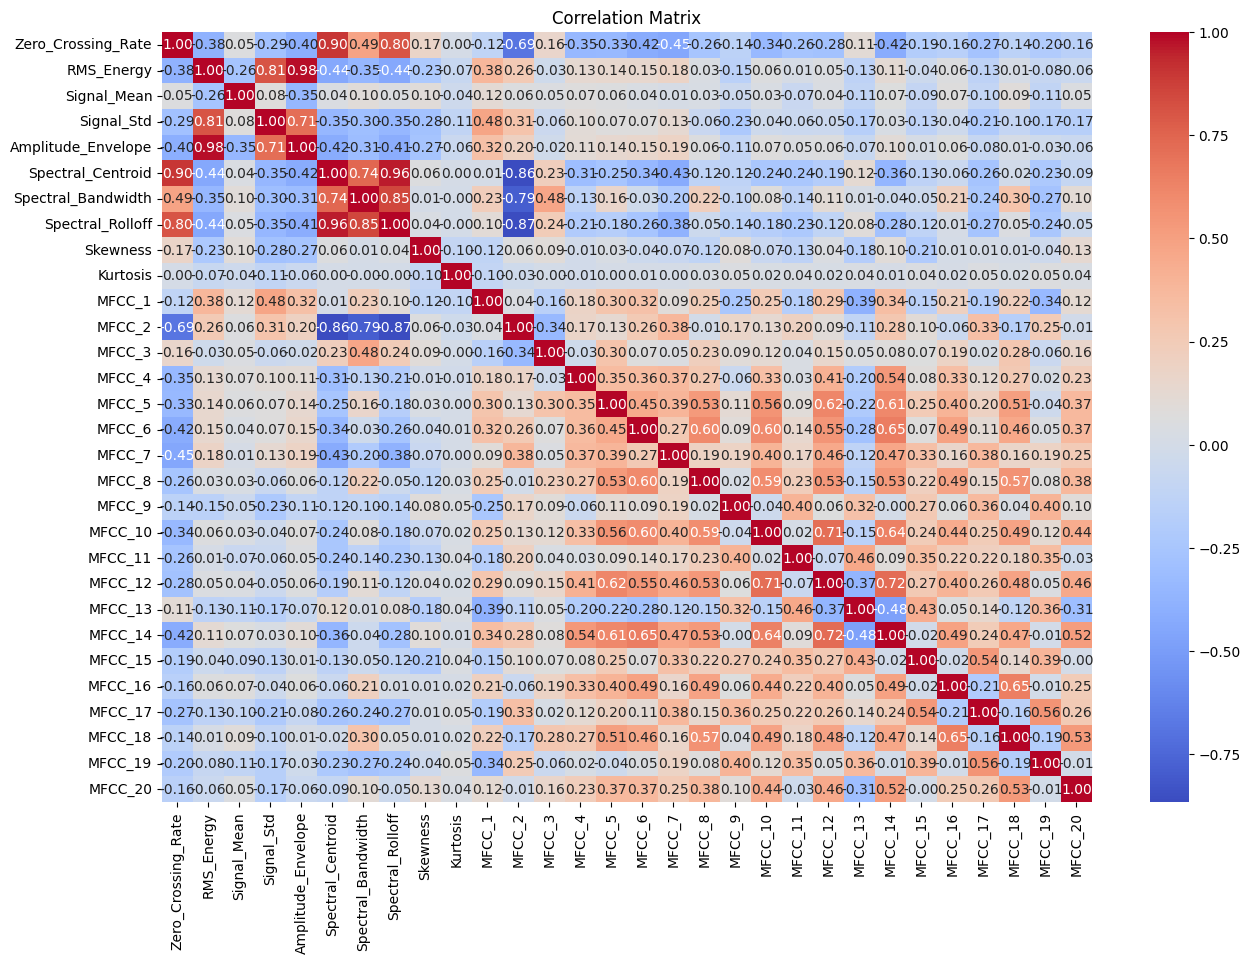

In [13]:
train_numeric = train.drop(columns=['Filename', 'Label'])
plt.figure(figsize=(15, 10))
sns.heatmap(train_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
X_train = train.drop(columns=['Filename', 'Label'])
y_train = train['Label']

X_test = test.drop(columns=['Filename', 'Label'])
y_test = test['Label']

X_val = val.drop(columns=['Filename', 'Label'])
y_val = val['Label']

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_
print(grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
y_test_pred = best_rf_model.predict(X_test_scaled)
y_test_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1]

In [19]:
accuracy_rf = accuracy_score(y_val, y_test_pred)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.6f}")

Random Forest Classifier Accuracy: 0.991202


In [20]:
print(classification_report(y_val, y_test_pred))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      5398
        real       0.99      0.99      0.99      5400

    accuracy                           0.99     10798
   macro avg       0.99      0.99      0.99     10798
weighted avg       0.99      0.99      0.99     10798



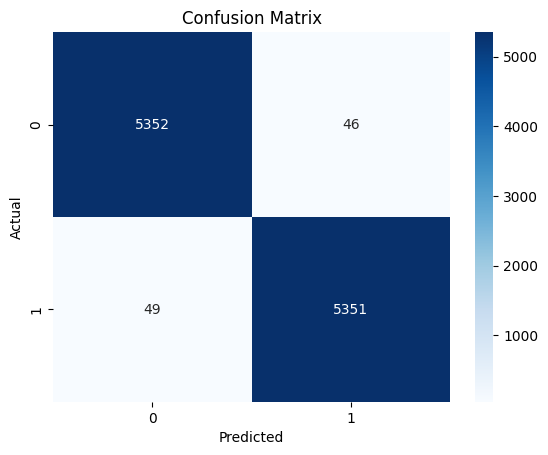

In [21]:
conf_matrix = confusion_matrix(y_val, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
label_mapping = {'fake': 0, 'real': 1}
y_train_lab = train['Label'].map(label_mapping)
y_test_lab = test['Label'].map(label_mapping)
y_val_lab = val['Label'].map(label_mapping)

In [62]:
fpr, tpr, _ = roc_curve(y_val_lab, y_test_proba)
roc_auc_rf = auc(fpr, tpr)

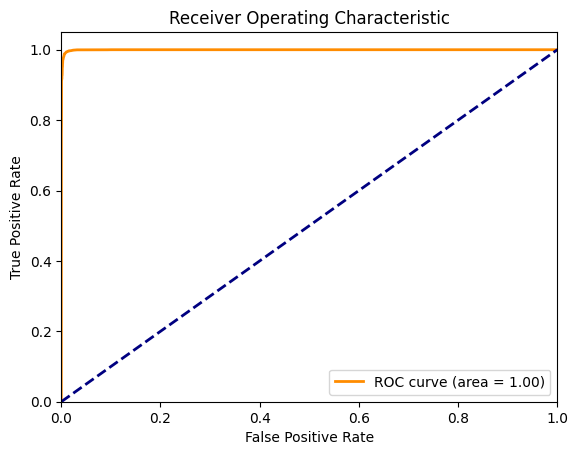

In [24]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Gradient Boosting Algorithm

In [28]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [29]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)

In [30]:
grid_search_gb.fit(X_train_scaled, y_train)
best_gb_model = grid_search_gb.best_estimator_
print(grid_search_gb.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [31]:
y_test_pred_gb = best_gb_model.predict(X_test_scaled)
y_test_proba_gb = best_gb_model.predict_proba(X_test_scaled)[:, 1]

In [32]:
accuracy_gb = accuracy_score(y_val, y_test_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.6f}")

Gradient Boosting Classifier Accuracy: 0.997036


In [33]:
print("Gradient Boosting Classifier:")
print(classification_report(y_val, y_test_pred_gb))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      5398
        real       1.00      1.00      1.00      5400

    accuracy                           1.00     10798
   macro avg       1.00      1.00      1.00     10798
weighted avg       1.00      1.00      1.00     10798



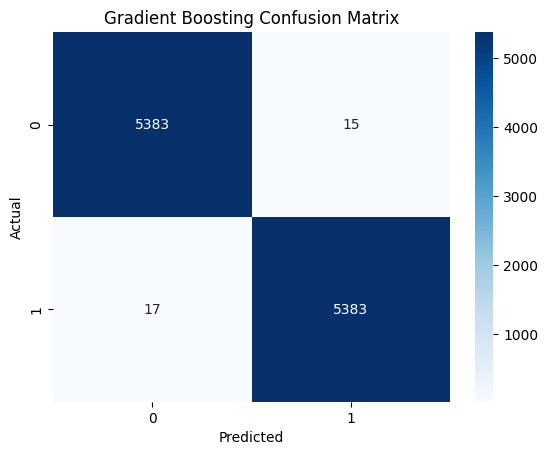

In [34]:
conf_matrix_gb = confusion_matrix(y_val, y_test_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
fpr_gb, tpr_gb, _ = roc_curve(y_val_lab, y_test_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

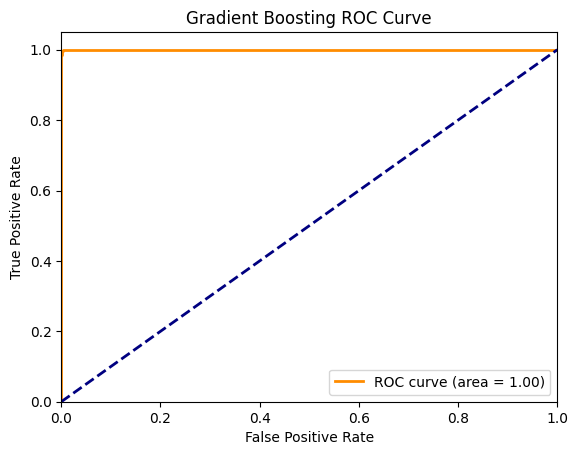

In [36]:
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train_scaled, y_train)

C:\Users\dishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [39]:
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
grid_search_ab = GridSearchCV(estimator=ab_model, param_grid=param_grid_ab, cv=3, n_jobs=-1, verbose=2)

In [40]:
grid_search_ab.fit(X_train_scaled, y_train)
best_ab_model = grid_search_ab.best_estimator_
print(grid_search_ab.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\dishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'learning_rate': 1, 'n_estimators': 200}


In [41]:
y_test_pred_ab = best_ab_model.predict(X_test_scaled)
y_test_proba_ab = best_ab_model.predict_proba(X_test_scaled)[:, 1]

In [42]:
accuracy_ab = accuracy_score(y_val, y_test_pred_ab)
print(f"AdaBoost Classifier Accuracy: {accuracy_ab:.6f}")

AdaBoost Classifier Accuracy: 0.945731


In [43]:
print("AdaBoost Classifier:")
print(classification_report(y_val, y_test_pred_ab))

AdaBoost Classifier:
              precision    recall  f1-score   support

        fake       0.94      0.95      0.95      5398
        real       0.95      0.94      0.95      5400

    accuracy                           0.95     10798
   macro avg       0.95      0.95      0.95     10798
weighted avg       0.95      0.95      0.95     10798



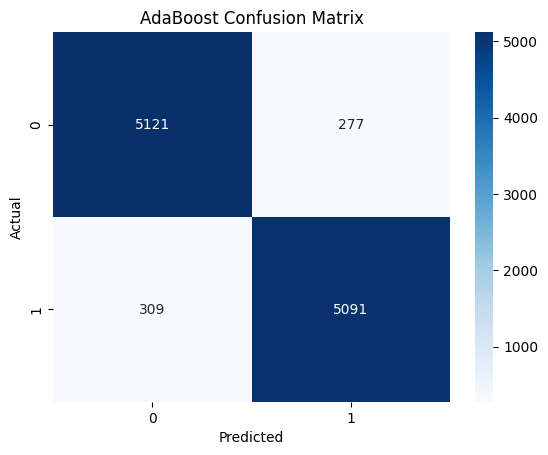

In [44]:
conf_matrix_ab = confusion_matrix(y_val, y_test_pred_ab)
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
fpr_ab, tpr_ab, _ = roc_curve(y_val_lab, y_test_proba_ab)
roc_auc_ab = auc(fpr_ab, tpr_ab)

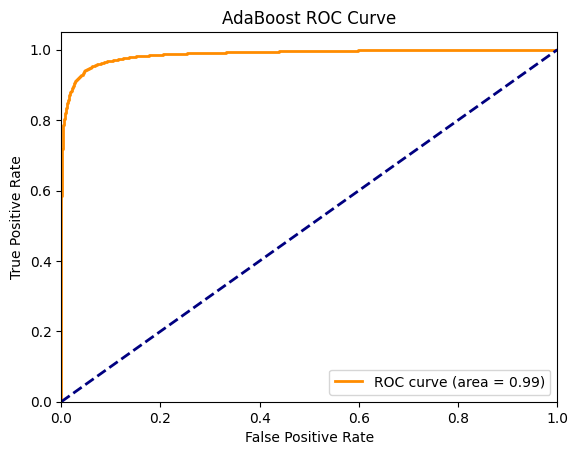

In [46]:
plt.figure()
plt.plot(fpr_ab, tpr_ab, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ab)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train_lab)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [29]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)

In [30]:
grid_search_xgb.fit(X_train_scaled, y_train_lab)
best_xgb_model = grid_search_xgb.best_estimator_
print(grid_search_xgb.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [33]:
y_test_pred_xgb = best_xgb_model.predict(X_test_scaled)
y_test_proba_xgb = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

In [34]:
accuracy_xgb = accuracy_score(y_test_lab, y_test_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.6f}")

XGBoost Classifier Accuracy: 0.997314


In [36]:
print("XGBoost Classifier:")
print(classification_report(y_val_lab, y_test_pred_xgb))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5398
           1       1.00      1.00      1.00      5400

    accuracy                           1.00     10798
   macro avg       1.00      1.00      1.00     10798
weighted avg       1.00      1.00      1.00     10798



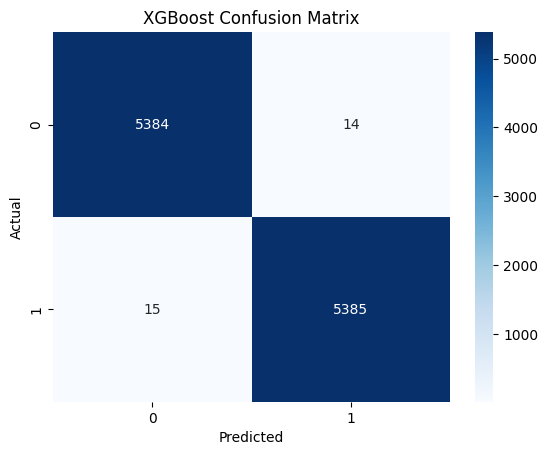

In [38]:
conf_matrix_xgb = confusion_matrix(y_val_lab, y_test_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_val_lab, y_test_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

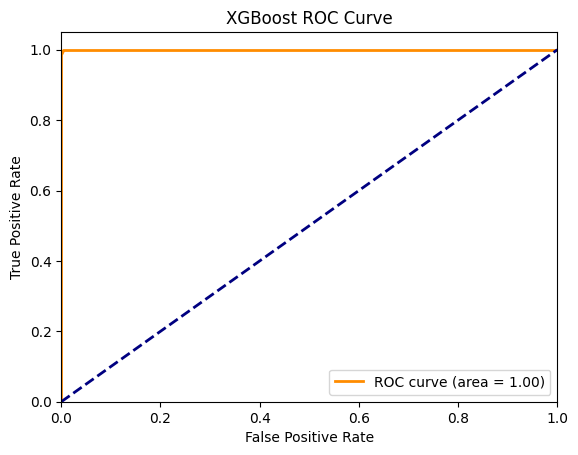

In [40]:
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
# Compare ROC AUC scores and Accuracy
models = ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost']
roc_aucs = [roc_auc_rf, roc_auc_gb, roc_auc_ab, roc_auc_xgb]
accuracies = [accuracy_rf, accuracy_gb, accuracy_ab, accuracy_xgb]

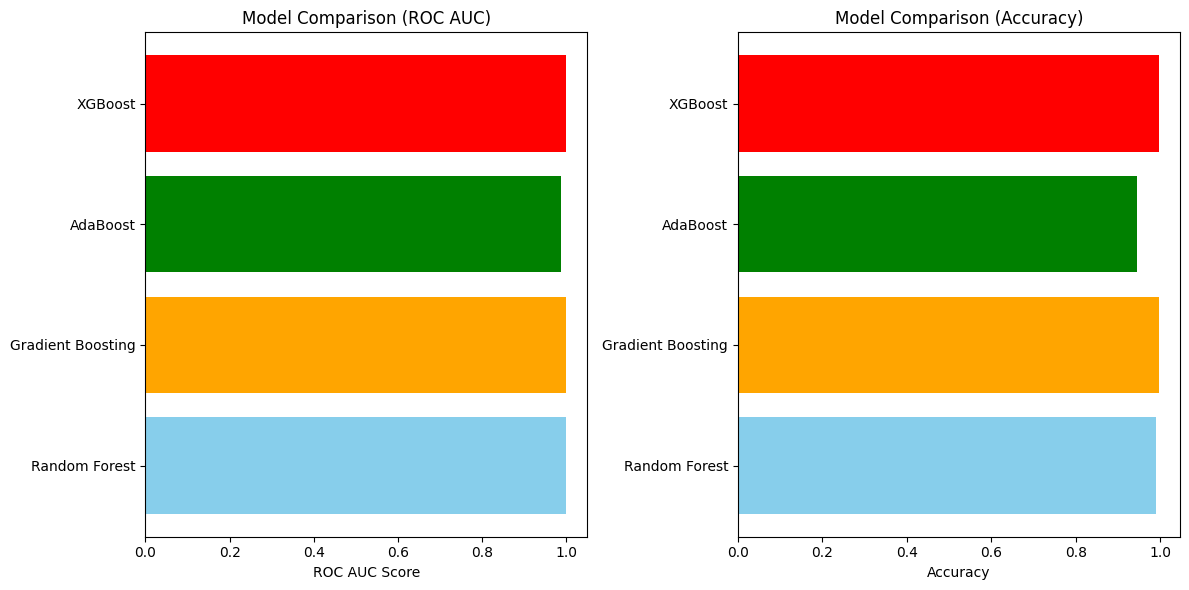

In [64]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(models, roc_aucs, color=['skyblue', 'orange', 'green', 'red'])
plt.xlabel('ROC AUC Score')
plt.title('Model Comparison (ROC AUC)')

plt.subplot(1, 2, 2)
plt.barh(models, accuracies, color=['skyblue', 'orange', 'green', 'red'])
plt.xlabel('Accuracy')
plt.title('Model Comparison (Accuracy)')
plt.tight_layout()
plt.show()

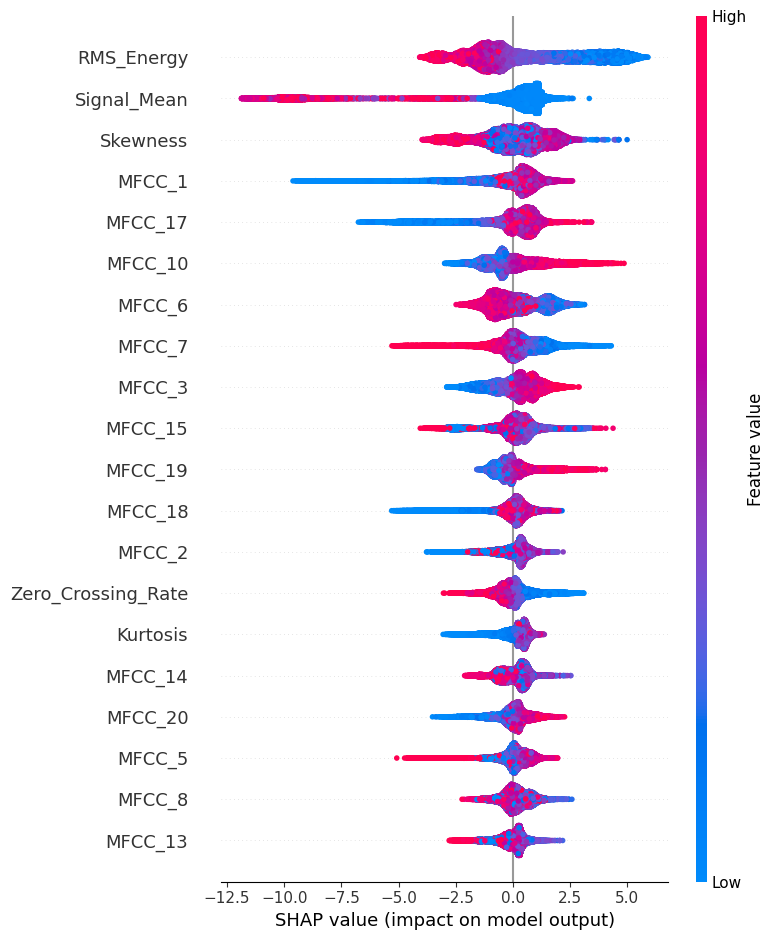

In [66]:
# SHAP values for XGBoost
explainer_xgb = shap.TreeExplainer(best_xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train_scaled)
shap.summary_plot(shap_values_xgb, X_train)

In [ ]:
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')